In [1]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.22.2.post1)


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import pandas as pd
import numpy as np

In [31]:
df=pd.read_csv("news.csv")

In [32]:
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [33]:
df = df.set_index("Unnamed: 0")

In [39]:
df.rename(columns={"title":"Title",'text':'Text',"label":"Label"}, inplace=True)

In [36]:
df_y = df.Label 

In [37]:
df.drop("Label", axis = 1, inplace=True)

In [40]:
df.head()

Title  \
Unnamed: 0                                                      
8476                             You Can Smell Hillary’s Fear   
10294       Watch The Exact Moment Paul Ryan Committed Pol...   
3608              Kerry to go to Paris in gesture of sympathy   
10142       Bernie supporters on Twitter erupt in anger ag...   
875          The Battle of New York: Why This Primary Matters   

                                                         Text  
Unnamed: 0                                                     
8476        Daniel Greenfield, a Shillman Journalism Fello...  
10294       Google Pinterest Digg Linkedin Reddit Stumbleu...  
3608        U.S. Secretary of State John F. Kerry said Mon...  
10142       — Kaydee King (@KaydeeKing) November 9, 2016 T...  
875         It's primary day in New York and front-runners...

In [41]:
len(df)

6335

In [44]:
df_x=df["Text"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=53)

In [47]:
cv = CountVectorizer(min_df=1,stop_words='english')

In [48]:
count_train = cv.fit_transform(x_train)

In [49]:
count_test = cv.transform(x_test)

In [50]:
tv = TfidfVectorizer(stop_words='english', max_df=0.7) 

In [51]:
tfidf_train = tv.fit_transform(x_train) 

In [52]:
tfidf_test = tv.transform(x_test)

In [53]:
print(tv.get_feature_names()[-10:]) 
print(cv.get_feature_names()[:10])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [54]:
count_df = pd.DataFrame(count_train.A, columns=cv.get_feature_names())

In [55]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tv.get_feature_names())

In [56]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [57]:
print(count_df.equals(tfidf_df))

False


In [58]:
count_df.head()

00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]

In [59]:
tfidf_df.head()

00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   
1  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   
2  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   
3  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   
4  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   

   حلب  عربي   عن   لم   ما  محاولات   من  هذا  والمرضى  ยงade  
0  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
1  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
2  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
3  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
4  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  

[5 rows x 56922 columns]

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [90]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [63]:
clf = MultinomialNB() 

In [83]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

accuracy:   0.857
Confusion matrix, without normalization


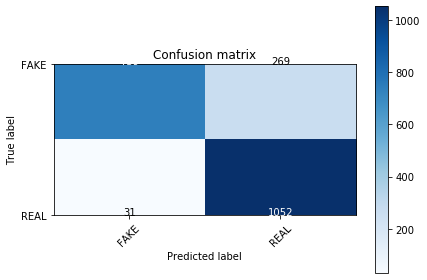

In [92]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [93]:
clf = MultinomialNB() 

accuracy:   0.893
Confusion matrix, without normalization


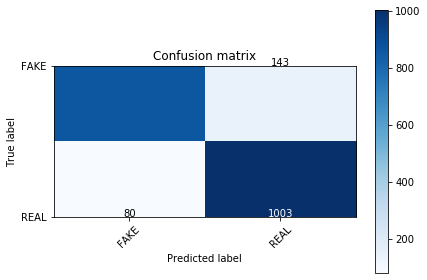

In [94]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [96]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [99]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.937
Confusion matrix, without normalization


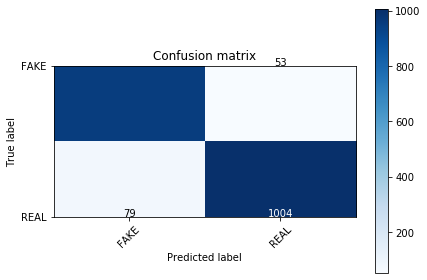

In [100]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [101]:
clf = MultinomialNB(alpha=0.1)

In [102]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


In [104]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tv, linear_clf, n=30)

FAKE -5.091541791120327 2016
FAKE -4.312095325073224 october
FAKE -4.113959851654149 hillary
FAKE -3.327274672293993 share
FAKE -2.963045791175302 november
FAKE -2.8911990720859952 article
FAKE -2.469527933510764 print
FAKE -2.4465444139505177 advertisement
FAKE -2.37516841956162 email
FAKE -2.278864792756916 war
FAKE -2.235597297334853 oct
FAKE -2.1583555152583185 podesta
FAKE -2.123190249268723 source
FAKE -2.086271946963729 establishment
FAKE -2.0457852306997437 mosul
FAKE -2.005275532002777 election
FAKE -1.9753010899035863 nov
FAKE -1.8133078833876908 wikileaks
FAKE -1.796037638819702 26
FAKE -1.776034939303832 daesh
FAKE -1.7502925427877196 corporate
FAKE -1.7244312454802624 donald
FAKE -1.7201923137035406 photo
FAKE -1.7025829183085692 jewish
FAKE -1.686690726106345 pipeline
FAKE -1.6669101776684647 reuters
FAKE -1.642172134419412 28
FAKE -1.639127149483692 ayotte
FAKE -1.6300668289266738 entire
FAKE -1.6162021460606748 snip

REAL 4.572109350051059 said
REAL 2.5303668033830267 t

In [105]:
feature_names = tv.get_feature_names()

In [106]:
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.257361214701583, 'trump'),
 (-6.494453094312678, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.037944662867073, 'obama'),
 (-7.146539983381228, 'sanders'),
 (-7.215376008647511, 'president'),
 (-7.266562805741618, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.341118458599064, 'state'),
 (-7.341357110247905, 'cruz'),
 (-7.378312441985425, 'party'),
 (-7.44688067245789, 'new'),
 (-7.476288801154588, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.580150633909893, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.634478172520314, 'voters'),
 (-7.648482443695299, 'rubio'),
 (-7.6734836186463795, 'states')]

In [107]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]